# Toxic comment Analysis on Twitter tweets Dataset

###  Importing all the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from io import StringIO
import pandas as pd
import re
import numpy as np
from nltk import word_tokenize
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import sys  
!{sys.executable} -m pip install contractions
import contractions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ranji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ranji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ranji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading the Train and Test Dataset

In [2]:

tweets_train_dataset=pd.read_csv("C:/Users/ranji/Desktop/NLP/Project/twitter hate speech/Code/Dataset/FinalDataset_Train1.csv")
tweets_test_dataset=pd.read_csv("C:/Users/ranji/Desktop/NLP/Project/twitter hate speech/Code/Dataset/FinalDataset_Test1.csv")

## Train Data

In [18]:
tweets_train_dataset.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,label,tweet
0,0,43636,43636,1,If you tell a dyke she looks just like a nigga...
1,1,6047,6047,0,i am joy. #i_am #positive #affirmation
2,2,8555,8555,0,why the more #actor will #book the #job from...
3,3,7507,7507,0,@user @user @user i know how u feel i didn't ...
4,4,29933,29933,0,trying not to shut down but maybe #pokemon wil...


## Test Data

In [19]:
tweets_test_dataset.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,label,tweet
0,46745,26678,26678,0,resistance. #job #ruiva #cacheada
1,46746,33358,33358,1,&#8220;@M_Rad: I'm going to miss these bitches...
2,46747,6249,6249,0,ð #tech bitcoin vs. gold [infographic]
3,46748,49095,49095,1,RT @Ronesha__: When I feel like he entertainin...
4,46749,55583,55583,1,bitch betta get it right...shout out....ddaaaw...


<AxesSubplot:xlabel='label', ylabel='count'>

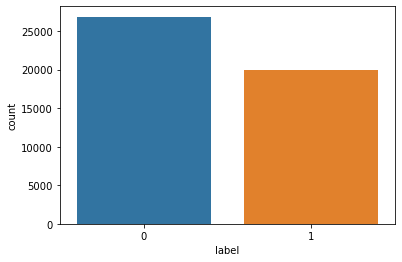

In [3]:
#Checking the Tweet Dataset Balance for Negative and Positive Tweets
import seaborn as sns
sns.countplot(x='label', data = tweets_train_dataset)

## Data Preprocessing

In [ ]:
#Converting tweets to Bag of words format after pre-processing

Bag_of_Words=[]
for Key,Value in tweets_train_dataset.iterrows():
    words = Value['tweet']
    
    expanded_words = []    
    for word in words.split():
      #expanding the contracted words
      expanded_words.append(contractions.fix(word))   
    words = ' '.join(expanded_words)
    
    #using regex to remove all the other special characters
    words = re.sub(r'[^A-Za-z0-9 ]+',' ',words)

    words=word_tokenize(words)

    #Converting words to lower case
    words = [w.lower() for w in words]
    
    #Removing stop words
    stop_words = nltk.corpus.stopwords.words('english')
    words = [i for i in words if not i in stop_words]
    
    #Converting tweets to Bag of Words
    for k in words:
        if k not in Bag_of_Words:
            Bag_of_Words.append(k)
            
#remove the comment to check the bag of words
#Bag_of_Words

In [5]:
print("Total number of Words:",len(Bag_of_Words))

Total number of Words: 56732


## Vectorizers

In [6]:
#Creating copies of Bag of words for Count and TF-IDF Vectorizer
Count_Bag_of_Words = Bag_of_Words.copy()
TF_IDF_Bag_of_Words = Bag_of_Words.copy()

In [7]:
#Initializing Vectorizers
Count_Vector_tweets = CountVectorizer()
Count_Vector_tweets = Count_Vector_tweets.fit(Count_Bag_of_Words)

TF_IDF_Vector_tweets= TfidfVectorizer()
TF_IDF_Vector_tweets = TF_IDF_Vector_tweets.fit(TF_IDF_Bag_of_Words)

In [8]:
#Train data for Count Vectorizer
Count_X = tweets_train_dataset['tweet']
Count_Y = tweets_train_dataset['label']
Count_X = np.array(Count_X)
Count_Y = np.array(Count_Y)

#Train data for TF_IDF Vectorizer
TF_IDF_X = tweets_train_dataset['tweet']
TF_IDF_Y = tweets_train_dataset['label']
TF_IDF_X = np.array(TF_IDF_X)
TF_IDF_Y = np.array(TF_IDF_Y)

## Training the Classification Models

In [9]:
#Defining Models to Train & Test the Dataset

def Machine_Learning_Models(Vector_tweets,X_train,y_train,X_test,y_test,train_accuracy):
    Final_pred= Vector_tweets.transform(X_train)
    Final_pred
    Accuracies_of_All_methods = []
    Knn = KNeighborsClassifier(n_neighbors=1)
    Knn.fit(Final_pred,y_train)
    X_test = Vector_tweets.transform(X_test)
    prediction = Knn.predict(X_test)
    Accuracies_of_All_methods.append(accuracy_score(y_test,prediction))
    if train_accuracy == 1:
        print("K-Nearest Neighbor Classifier done")
    else:
        print("K-Nearest Neighbor Classifier :-")
        print("Confusion Matrix")
        print(confusion_matrix(y_test,prediction))
        print("Classification Report")
        print(classification_report(y_test,prediction))
    
    Support_Vector_Machine = SVC()
    Support_Vector_Machine.fit(Final_pred,y_train)
    prediction = Support_Vector_Machine.predict(X_test)
    Accuracies_of_All_methods.append(accuracy_score(y_test,prediction))
    if train_accuracy == 1:
        print("Support Vector Machine Classifier done")
    else:
        print("Support Vector Machine Classifier :-")
        print("Confusion Matrix")
        print(confusion_matrix(y_test,prediction))
        print("Classification Report")
        print(classification_report(y_test,prediction))
    
    Multinomial_Naive_Bayes = MultinomialNB()
    Multinomial_Naive_Bayes.fit(Final_pred,y_train)
    prediction = Multinomial_Naive_Bayes.predict(X_test)
    Accuracies_of_All_methods.append(accuracy_score(y_test,prediction))
    if train_accuracy == 1:
        print("Multinomial Naive Bayes classifier done")
    else:
        print("Multinomial Naive Bayes classifier :-")
        print("Confusion Matrix")
        print(confusion_matrix(y_test,prediction))
        print("Classification Report")
        print(classification_report(y_test,prediction))
    
    # Logistic Regression Classifier
    Logistic_Regression = LogisticRegression()
    Logistic_Regression.fit(Final_pred,y_train)
    prediction = Logistic_Regression.predict(X_test)
    Accuracies_of_All_methods.append(accuracy_score(y_test,prediction))
    if train_accuracy == 1:
        print("Logistic Regression Classifier done")
        return Accuracies_of_All_methods
    else:
        print("Logistic Regression Classifier :-")
        print("Confusion Matrix")
        print(confusion_matrix(y_test,prediction))
        print("Classification Report")
        print(classification_report(y_test,prediction))
    print("Test Accuracy of Models:-")
    print("KNN : ",Accuracies_of_All_methods[0])
    print("SVM : ",Accuracies_of_All_methods[1])
    print("Naive Bayes : ",Accuracies_of_All_methods[2])
    print("Logistic Regression : ",Accuracies_of_All_methods[3])

## 5-fold cross validation

In [10]:
# 5 Fold cross validation is implemented to find testing accuracy

# Fold 1 for Count Vectorizer
print("Count Vectorizer\n")
print("Fold1")
Count_X_train1 = Count_X[9349:]
Count_Y_train1 = Count_Y[9349:]
Count_X_val1 = Count_X[:9349]
Count_Y_val1 = Count_Y[:9349]

Count_fold1 = Machine_Learning_Models(Count_Vector_tweets,Count_X_train1, Count_Y_train1, Count_X_val1, Count_Y_val1,1)

print(Count_fold1)

# Fold 1 for TF-IDF Vectorizer
print("TF-IDF Vectorizer\n")
print("Fold1")
TF_IDF_X_train1 = TF_IDF_X[9349:]
TF_IDF_Y_train1 = TF_IDF_Y[9349:]
TF_IDF_X_val1 = TF_IDF_X[:9349]
TF_IDF_Y_val1 = TF_IDF_Y[:9349]

TF_IDF_fold1 = Machine_Learning_Models(TF_IDF_Vector_tweets,TF_IDF_X_train1, TF_IDF_Y_train1, TF_IDF_X_val1, TF_IDF_Y_val1,1)
print(TF_IDF_fold1)

Count Vectorizer

Fold1
K-Nearest Neighbor Classifier done
Support Vector Machine Classifier done
Multinomial Naive Bayes classifier done
Logistic Regression Classifier done
[0.8154882875173816, 0.9423467750561557, 0.918921809819232, 0.9452347844689272]
TF-IDF Vectorizer

Fold1
K-Nearest Neighbor Classifier done
Support Vector Machine Classifier done
Multinomial Naive Bayes classifier done
Logistic Regression Classifier done
[0.6724783399294042, 0.9420258851214034, 0.9239490854636859, 0.9328270403251685]


In [11]:
# Fold 2 for Count Vectorizer
print("Count Vectorizer\n")
print("Fold 2")
Count_fold2= []
Count_X_train2 = np.concatenate((Count_X[:9349], Count_X[18698:]), axis=0)
Count_Y_train2 = np.concatenate((Count_Y[:9349], Count_Y[18698:]), axis=0)
Count_X_val2 = Count_X[9349:18698]
Count_Y_val2 = Count_Y[9349:18698]

Count_fold2 = Machine_Learning_Models(Count_Vector_tweets,Count_X_train2, Count_Y_train2, Count_X_val2, Count_Y_val2,1)
print(Count_fold2)

# Fold 2 for TF-IDF Vectorizer
print("TF-IDF Vectorizer\n")
print("Fold 2")
fold2= []
TF_IDF_X_train2 = np.concatenate((TF_IDF_X[:9349], TF_IDF_X[18698:]), axis=0)
TF_IDF_Y_train2 = np.concatenate((TF_IDF_Y[:9349], TF_IDF_Y[18698:]), axis=0)
TF_IDF_X_val2 = TF_IDF_X[9349:18698]
TF_IDF_Y_val2 = TF_IDF_Y[9349:18698]

TF_IDF_fold2 = Machine_Learning_Models(TF_IDF_Vector_tweets,TF_IDF_X_train2, TF_IDF_Y_train2, TF_IDF_X_val2, TF_IDF_Y_val2,1)
print(TF_IDF_fold2)

Count Vectorizer

Fold 2
K-Nearest Neighbor Classifier done
Support Vector Machine Classifier done
Multinomial Naive Bayes classifier done
Logistic Regression Classifier done
[0.8879024494598353, 0.9399935822013049, 0.9172103968338859, 0.9422398117445716]
TF-IDF Vectorizer

Fold 2
K-Nearest Neighbor Classifier done
Support Vector Machine Classifier done
Multinomial Naive Bayes classifier done
Logistic Regression Classifier done
[0.7746283024922451, 0.9396726922665526, 0.9202053695582415, 0.9318643705209113]


In [12]:
# Fold 3 for Count Vectorizer
print("Count Vectorizer\n")
print("Fold 3")
Count_fold3= []
Count_X_train3 = np.concatenate((Count_X[:18698], Count_X[28047:]), axis=0)
Count_Y_train3 = np.concatenate((Count_Y[:18698], Count_Y[28047:]), axis=0)
Count_X_val3 = Count_X[18698:28047]
Count_Y_val3 = Count_Y[18698:28047]

Count_fold3 = Machine_Learning_Models(Count_Vector_tweets,Count_X_train3, Count_Y_train3, Count_X_val3, Count_Y_val3,1)
print(Count_fold3)

# Fold 3 for TF-IDF Vectorizer
print("TF-IDF Vectorizer\n")
print("Fold 3")
TF_IDF_fold3= []
TF_IDF_X_train3 = np.concatenate((TF_IDF_X[:18698], TF_IDF_X[28047:]), axis=0)
TF_IDF_Y_train3 = np.concatenate((TF_IDF_Y[:18698], TF_IDF_Y[28047:]), axis=0)
TF_IDF_X_val3 = TF_IDF_X[18698:28047]
TF_IDF_Y_val3 = TF_IDF_Y[18698:28047]

TF_IDF_fold3 = Machine_Learning_Models(TF_IDF_Vector_tweets,TF_IDF_X_train3, TF_IDF_Y_train3, TF_IDF_X_val3, TF_IDF_Y_val3,1)
print(TF_IDF_fold3)

Count Vectorizer

Fold 3
K-Nearest Neighbor Classifier done
Support Vector Machine Classifier done
Multinomial Naive Bayes classifier done
Logistic Regression Classifier done
[0.8870467429671622, 0.9368916461653652, 0.9132527543052733, 0.9414910685634827]
TF-IDF Vectorizer

Fold 3
K-Nearest Neighbor Classifier done
Support Vector Machine Classifier done
Multinomial Naive Bayes classifier done
Logistic Regression Classifier done
[0.766819980746604, 0.9371055727885336, 0.9168895068991336, 0.929939030912397]


In [13]:
# Fold 4 for Count Vectorizer
print("Count Vectorizer\n")
print("Fold 4")
Count_fold4= []
Count_X_train4 = np.concatenate((Count_X[:28047], Count_X[37396:]), axis=0)
Count_Y_train4 = np.concatenate((Count_Y[:28047], Count_Y[37396:]), axis=0)
Count_X_val4 = Count_X[28047:37396]
Count_Y_val4 = Count_Y[28047:37396]

Count_fold4 = Machine_Learning_Models(Count_Vector_tweets,Count_X_train4, Count_Y_train4, Count_X_val4, Count_Y_val4,1)
print(Count_fold4)

# Fold 4 for TF-IDF Vectorizer
print("TF-IDF Vectorizer\n")
print("TF_IDF_Fold 4")
TF_IDF_fold4= []
TF_IDF_X_train4 = np.concatenate((TF_IDF_X[:28047], TF_IDF_X[37396:]), axis=0)
TF_IDF_Y_train4 = np.concatenate((TF_IDF_Y[:28047], TF_IDF_Y[37396:]), axis=0)
TF_IDF_X_val4 = TF_IDF_X[28047:37396]
TF_IDF_Y_val4 = TF_IDF_Y[28047:37396]

TF_IDF_fold4 = Machine_Learning_Models(TF_IDF_Vector_tweets, TF_IDF_X_train4, TF_IDF_Y_train4, TF_IDF_X_val4, TF_IDF_Y_val4,1)
print(TF_IDF_fold4)

Count Vectorizer

Fold 4
K-Nearest Neighbor Classifier done
Support Vector Machine Classifier done
Multinomial Naive Bayes classifier done
Logistic Regression Classifier done
[0.8950689913359717, 0.9396726922665526, 0.9225585624130923, 0.9461974542731842]
TF-IDF Vectorizer

TF_IDF_Fold 4
K-Nearest Neighbor Classifier done
Support Vector Machine Classifier done
Multinomial Naive Bayes classifier done
Logistic Regression Classifier done
[0.7738795593111563, 0.9411701786287303, 0.925660498449032, 0.9328270403251685]


In [14]:
# Fold 5 for Count Vectorizer
print("Count Vectorizer\n")
print("Fold 5")
Count_X_train5 = Count_X[:37396]
Count_Y_train5 = Count_Y[:37396]
Count_X_val5 = Count_X[37396:]
Count_Y_val5 = Count_Y[37396:]

Count_fold5 = Machine_Learning_Models(Count_Vector_tweets, Count_X_train5, Count_Y_train5, Count_X_val5, Count_Y_val5,1)
print(Count_fold5)

# Fold 5 for TF-IDF Vectorizer
print("TF-IDF Vectorizer\n")
print("TF_IDF_Fold 5")
TF_IDF_X_train5 = TF_IDF_X[:37396]
TF_IDF_Y_train5 = TF_IDF_Y[:37396]
TF_IDF_X_val5 = TF_IDF_X[37396:]
TF_IDF_Y_val5 = TF_IDF_Y[37396:]

TF_IDF_fold5 = Machine_Learning_Models(TF_IDF_Vector_tweets, TF_IDF_X_train5, TF_IDF_Y_train5, TF_IDF_X_val5, TF_IDF_Y_val5,1)
print(TF_IDF_fold5)

Count Vectorizer

Fold 5
K-Nearest Neighbor Classifier done
Support Vector Machine Classifier done
Multinomial Naive Bayes classifier done
Logistic Regression Classifier done
[0.8938923949085463, 0.9435233714835811, 0.9242699753984384, 0.9473740507006096]
TF-IDF Vectorizer

TF_IDF_Fold 5
K-Nearest Neighbor Classifier done
Support Vector Machine Classifier done
Multinomial Naive Bayes classifier done
Logistic Regression Classifier done
[0.7758048989196705, 0.9430955182372446, 0.9266231682532892, 0.9336827468178415]


## Models Evaluation and testing

In [33]:
print("Count Vectorizer Accurary for Different Models:\n")
print("Average Training accuracy of KNN:", (Count_fold1[0]+Count_fold2[0]+Count_fold3[0]+Count_fold4[0]+Count_fold5[0])/5)
print("Average Training accuracy of SVM:", (Count_fold1[1]+Count_fold2[1]+Count_fold3[1]+Count_fold4[1]+Count_fold5[1])/5)
print("Average Training accuracy of Naive Bayes:", (Count_fold1[2]+Count_fold2[2]+Count_fold3[2]+Count_fold4[2]+Count_fold5[2])/5)
print("Average Training accuracy of Logistic Regression:", (Count_fold1[3]+Count_fold2[3]+Count_fold3[3]+Count_fold4[3]+Count_fold5[3])/5)

print("\n\nTF-IDF Vectorizer Accurary for Different Models:\n")
print("Average Training accuracy of KNN:", (TF_IDF_fold1[0]+TF_IDF_fold2[0]+TF_IDF_fold3[0]+TF_IDF_fold4[0]+TF_IDF_fold5[0])/5)
print("Average Training accuracy of SVM:", (TF_IDF_fold1[1]+TF_IDF_fold2[1]+TF_IDF_fold3[1]+TF_IDF_fold4[1]+TF_IDF_fold5[1])/5)
print("Average Training accuracy of Naive Bayes:", (TF_IDF_fold1[2]+TF_IDF_fold2[2]+TF_IDF_fold3[2]+TF_IDF_fold4[2]+TF_IDF_fold5[2])/5)
print("Average Training accuracy of Logistic Regression:", (TF_IDF_fold1[3]+TF_IDF_fold2[3]+TF_IDF_fold3[3]+TF_IDF_fold4[3]+TF_IDF_fold5[3])/5)

Count Vectorizer Accurary for Different Models:

Average Training accuracy of KNN: 0.8758797732377793
Average Training accuracy of SVM: 0.9043130898409538
Average Training accuracy of Naive Bayes: 0.9192426997539844
Average Training accuracy of Logistic Regression: 0.9081802249520721


TF-IDF Vectorizer Accurary for Different Models:

Average Training accuracy of KNN: 0.752722216279816
Average Training accuracy of SVM: 0.9044365090466278
Average Training accuracy of Naive Bayes: 0.9226655257246763
Average Training accuracy of Logistic Regression: 0.9139490644904879


In [16]:
# Test dataset taken to calculate Test accuracy for Count Vectorizer
print("Count Vectorizer\n")
Count_X_test = tweets_test_dataset['tweet']
Count_y_test = tweets_test_dataset['label']

# Test dataset taken to calculate Test accuracy for TF-IDF Vectorizer
print("TF-IDF Vectorizer\n")
TF_IDF_X_test = tweets_test_dataset['tweet']
TF_IDF_y_test = tweets_test_dataset['label']

Count Vectorizer

TF-IDF Vectorizer



In [17]:
#Testing the Count Vectorizer Model

print("Testing the Models trained using Count Vectorizer")
Machine_Learning_Models(Count_Vector_tweets,Count_X,Count_Y,Count_X_test,Count_y_test,0) 



#Testing the TF-IDF Vectorizer Model

print("Testing the Models trained using TF-IDF Vectorizer")
Machine_Learning_Models(TF_IDF_Vector_tweets,TF_IDF_X,TF_IDF_Y,TF_IDF_X_test,TF_IDF_y_test,0)

Testing the Models trained using Count Vectorizer
K-Nearest Neighbor Classifier :-
Confusion Matrix
[[5460  279]
 [ 776 3485]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5739
           1       0.93      0.82      0.87      4261

    accuracy                           0.89     10000
   macro avg       0.90      0.88      0.89     10000
weighted avg       0.90      0.89      0.89     10000

Support Vector Machine Classifier :-
Confusion Matrix
[[5596  143]
 [ 430 3831]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5739
           1       0.96      0.90      0.93      4261

    accuracy                           0.94     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

Multinomial Naive Bayes classifier :-
Confusion Matrix
[[5228  511]
 [ 339 3922]]
Classificati